# **Importing Libraries**

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Required Functions**

In [3]:
class pf:

  def replacer(df):
    for i in df.columns:
      if df[i].dtypes=="object":
        x=list(df[i].mode())[0]
        df[i]=df[i].fillna(x)
      else:
        x=df[i].mean()
        df[i]=df[i].fillna(x)
    return df.isna().sum()


  def UNI(df,fs):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    
    import seaborn as sb
    import matplotlib.pyplot as plt
    plt.figure(figsize=fs)
    cols=3
    tot_rows=df.shape[1]
    rows=(tot_rows//cols)+1
    plt_no=1
    for i in con:
      plt.subplot(rows,cols,plt_no)
      sb.distplot(df[i])
      plt_no+=1
    
    for i in cat:
      plt.subplot(rows,cols,plt_no)
      q=sb.countplot(df[i])
      q.set_xticklabels(q.get_xticklabels(),rotation=21,horizontalalignment="right")
      plt_no+=1


  def BIV(df,fs,con_col):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    
    import seaborn as sb
    import matplotlib.pyplot as plt
    plt.figure(figsize=fs)
    cols=3
    tot_rows=df.shape[1]
    rows=(tot_rows//cols)+1
    plt_no=1
    for i in con:
      plt.subplot(rows,cols,plt_no)
      sb.scatterplot(df[i],df[con_col])
      plt_no+=1
    
    for i in cat:
      plt.subplot(rows,cols,plt_no)
      sb.boxplot(df[i],df[con_col])
      plt_no+=1


  def HEATMAP(df,fs):
    import seaborn as sb
    import matplotlib.pyplot as plt
    plt.figure(figsize=fs)
    sb.heatmap(df.corr(),annot=True,cmap="coolwarm")


  def out_ana(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    ss=StandardScaler()
    A1=pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    out=A1[A1>3].sum().sort_values()
    out_list=list(out[out>2.9].index)
    print("Features with Outliers are: ","\n")
    for i in out_list:
      print(i)
      print("------------------------------")

  def out_removal(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    ss=StandardScaler()
    A1=pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    out=A1[A1>3].sum().sort_values()
    out_list=list(out[out>2.9].index)
    A2=pd.DataFrame(df[cat],columns=cat)
    A=A1.join(A2)

    for i in out_list:
      A=A[(A[i]>-3)&(A[i]<3)]
    
    a1=pd.DataFrame(ss.inverse_transform(A[con]),columns=con)
    a2=pd.DataFrame(A[cat],columns=cat)
    a=a1.join(a2)

    return a


  def anova_ana_con(df,con_col):
    cat=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
    
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    for i in cat:
      reg=con_col+"~"+i
      model=ols(reg,df).fit()
      results=anova_lm(model)
      print("---------------",con_col,"vs",i,"-----------------------")
      print("pvalue: ",results.iloc[0,4],"\n")

  def anova_con(df,con_col):
    cat=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
    
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    imp_cat=[]
    for i in cat:
      reg=con_col+"~"+i
      model=ols(reg,df).fit()
      results=anova_lm(model)
      if results.iloc[0,4] < 0.05:
        imp_cat.append(i)
    return imp_cat


  def anova_ana_cat(df,cat_col):
    con=[]
    for i in df.columns:
      if df[i].dtypes!="object":
        con.append(i)
    
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    for i in con:
      reg=cat_col+"~"+i
      model=ols(reg,df).fit()
      results=anova_lm(model)
      print("---------------",cat_col,"vs",i,"-----------------------")
      print("pvalue: ",results.iloc[0,4],"\n")

  def anova_cat(df,cat_col):
    con=[]
    for i in df.columns:
      if df[i].dtypes!="object":
        con.append(i)
    
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    imp_con=[]
    for i in con:
      reg=cat_col+"~"+i
      model=ols(reg,df).fit()
      results=anova_lm(model)
      if results.iloc[0,4] < 0.05:
        imp_con.append(i)
    return imp_con


  def CHI_ana(df,cat_col):
    cat=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
    
    from scipy.stats import chi2_contingency
    import pandas as pd
    for i in cat:
      results=chi2_contingency(pd.crosstab(df[cat_col],df[i]))
      print("-----------------",cat_col,"vs",i,"-----------------------")
      print("chi2_score: ",results[0])
      print("Pvalue: ",results[1],"\n")

  def CHI(df,cat_col):
    cat=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
    
    from scipy.stats import chi2_contingency
    import pandas as pd
    imp_cat=[]
    for i in cat:
      results=chi2_contingency(pd.crosstab(df[cat_col],df[i]))
      if results[1]<0.05 and i!=cat_col:
        imp_cat.append(i)
    return imp_cat


  def skewplot(df,fs):
    con=[]
    for i in df.columns:
      if df[i].dtypes!="object":
        con.append(i)
    import matplotlib.pyplot as plt
    import seaborn as sb
    plt.figure(figsize=fs)
    cols=3
    tot_rows=len(con)
    rows=(tot_rows//cols)+1
    plt_no=1
    for i in con:
      plt.subplot(rows,cols,plt_no)
      sb.distplot(df[i])
      plt_no+=1


  def prep(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    ss=StandardScaler()
    X1=pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X2=pd.get_dummies(df[cat])
    Xnew=X1.join(X2)
    return Xnew

  def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].stypes=="object":
        cat.append(i)
      else:
        con.append(i)
    return cat,con

# **Reading Data**

In [8]:
a1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Personal Projects/Dengue Data Driven/dengue_train.csv")

In [9]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [10]:
a1.shape

(1456, 25)

In [11]:
a1.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5


# **Missing Data Treatment**

In [12]:
pf.replacer(a1)

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

# **Outlier Analysis**

In [13]:
pf.out_ana(a1)

Features with Outliers are:  

reanalysis_tdtr_k
------------------------------
station_max_temp_c
------------------------------
reanalysis_max_air_temp_k
------------------------------
station_diur_temp_rng_c
------------------------------
ndvi_se
------------------------------
ndvi_sw
------------------------------
precipitation_amt_mm
------------------------------
reanalysis_sat_precip_amt_mm
------------------------------
station_precip_mm
------------------------------
reanalysis_precip_amt_kg_per_m2
------------------------------
total_cases
------------------------------


**We have outliers in the following features:**

reanalysis_tdtr_k

station_max_temp_c

reanalysis_max_air_temp_k

station_diur_temp_rng_c

ndvi_se

ndvi_sw

precipitation_amt_mm

reanalysis_sat_precip_amt_mm

station_precip_mm

reanalysis_precip_amt_kg_per_m2

total_cases

In [14]:
a = pf.out_removal(a1)

In [15]:
a1.shape

(1456, 25)

In [16]:
a.shape

(1337, 25)

# **Univariate Analysis**

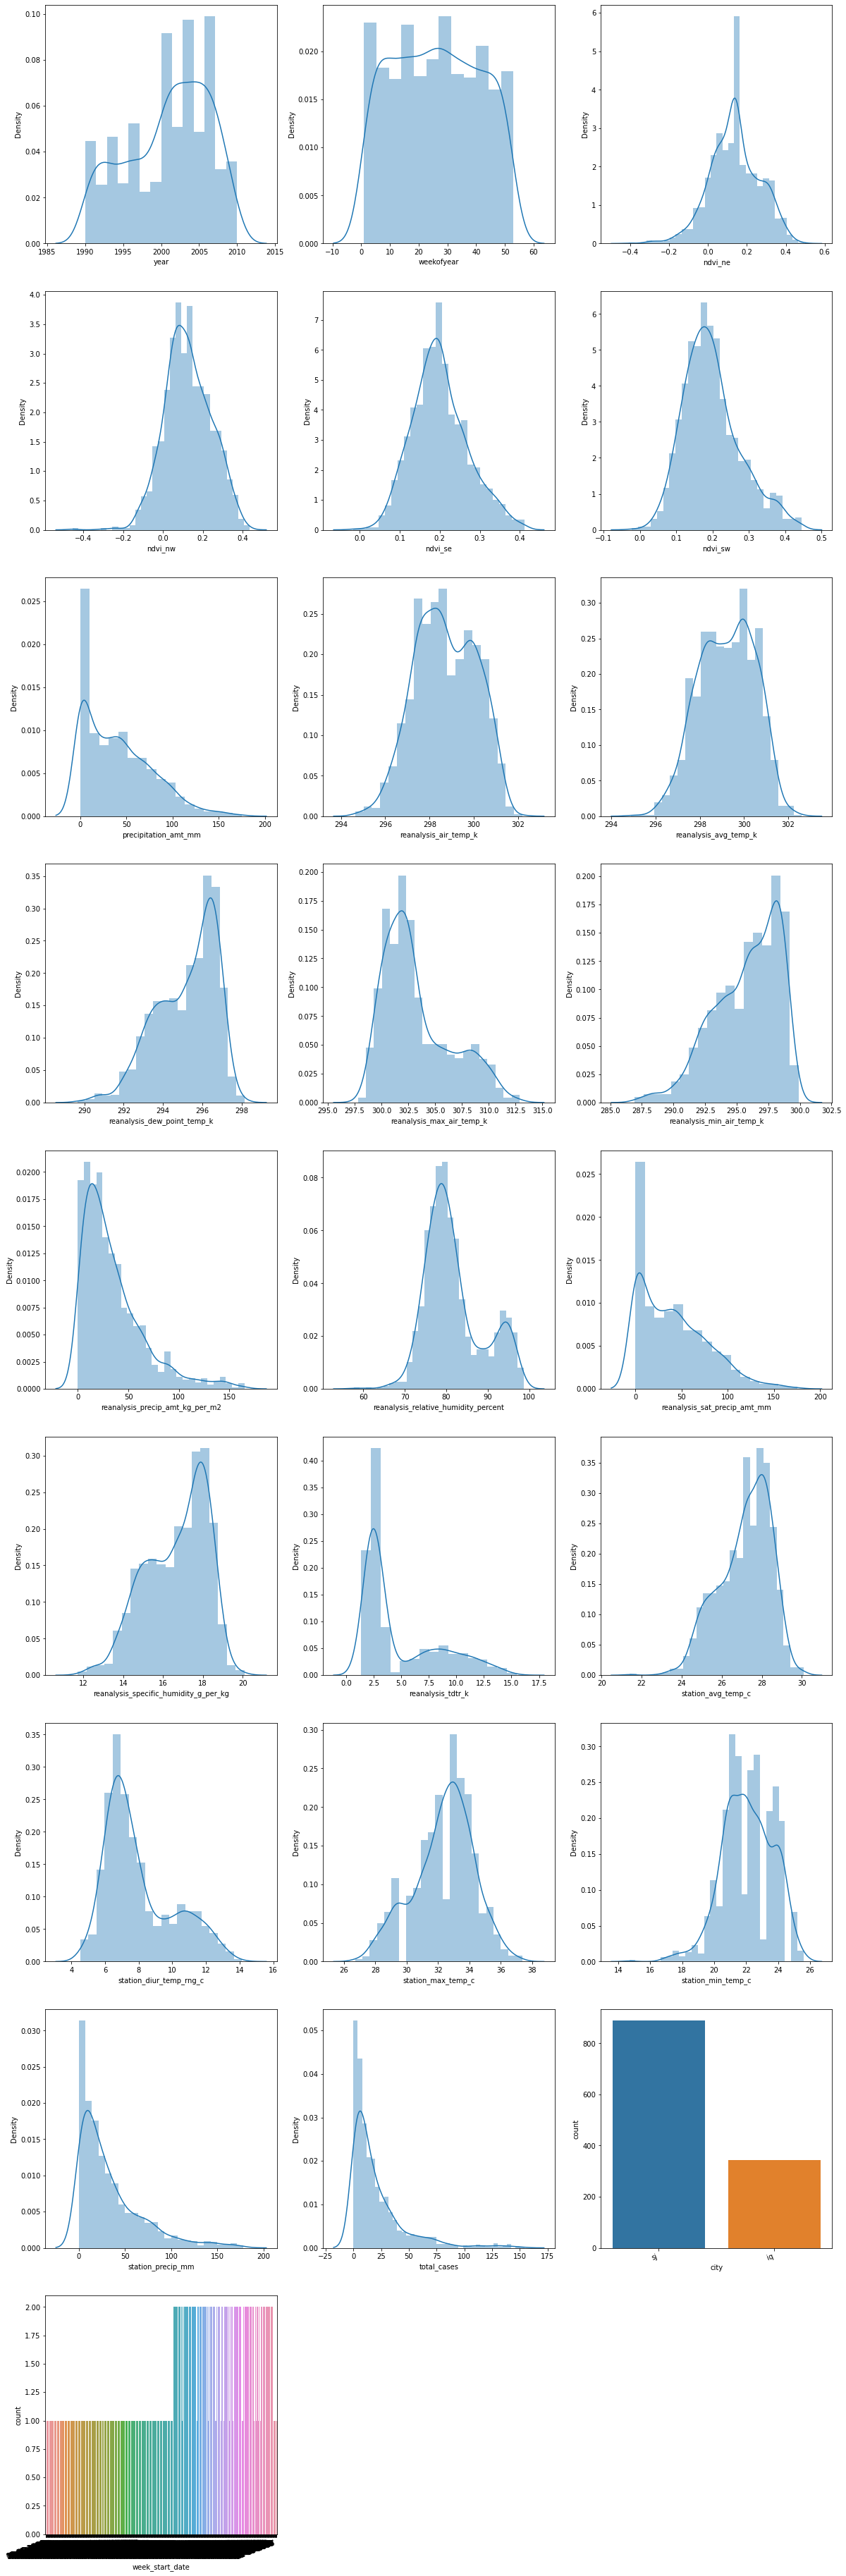

In [17]:
pf.UNI(a,(20,66))

# **Bivariate Analysis**

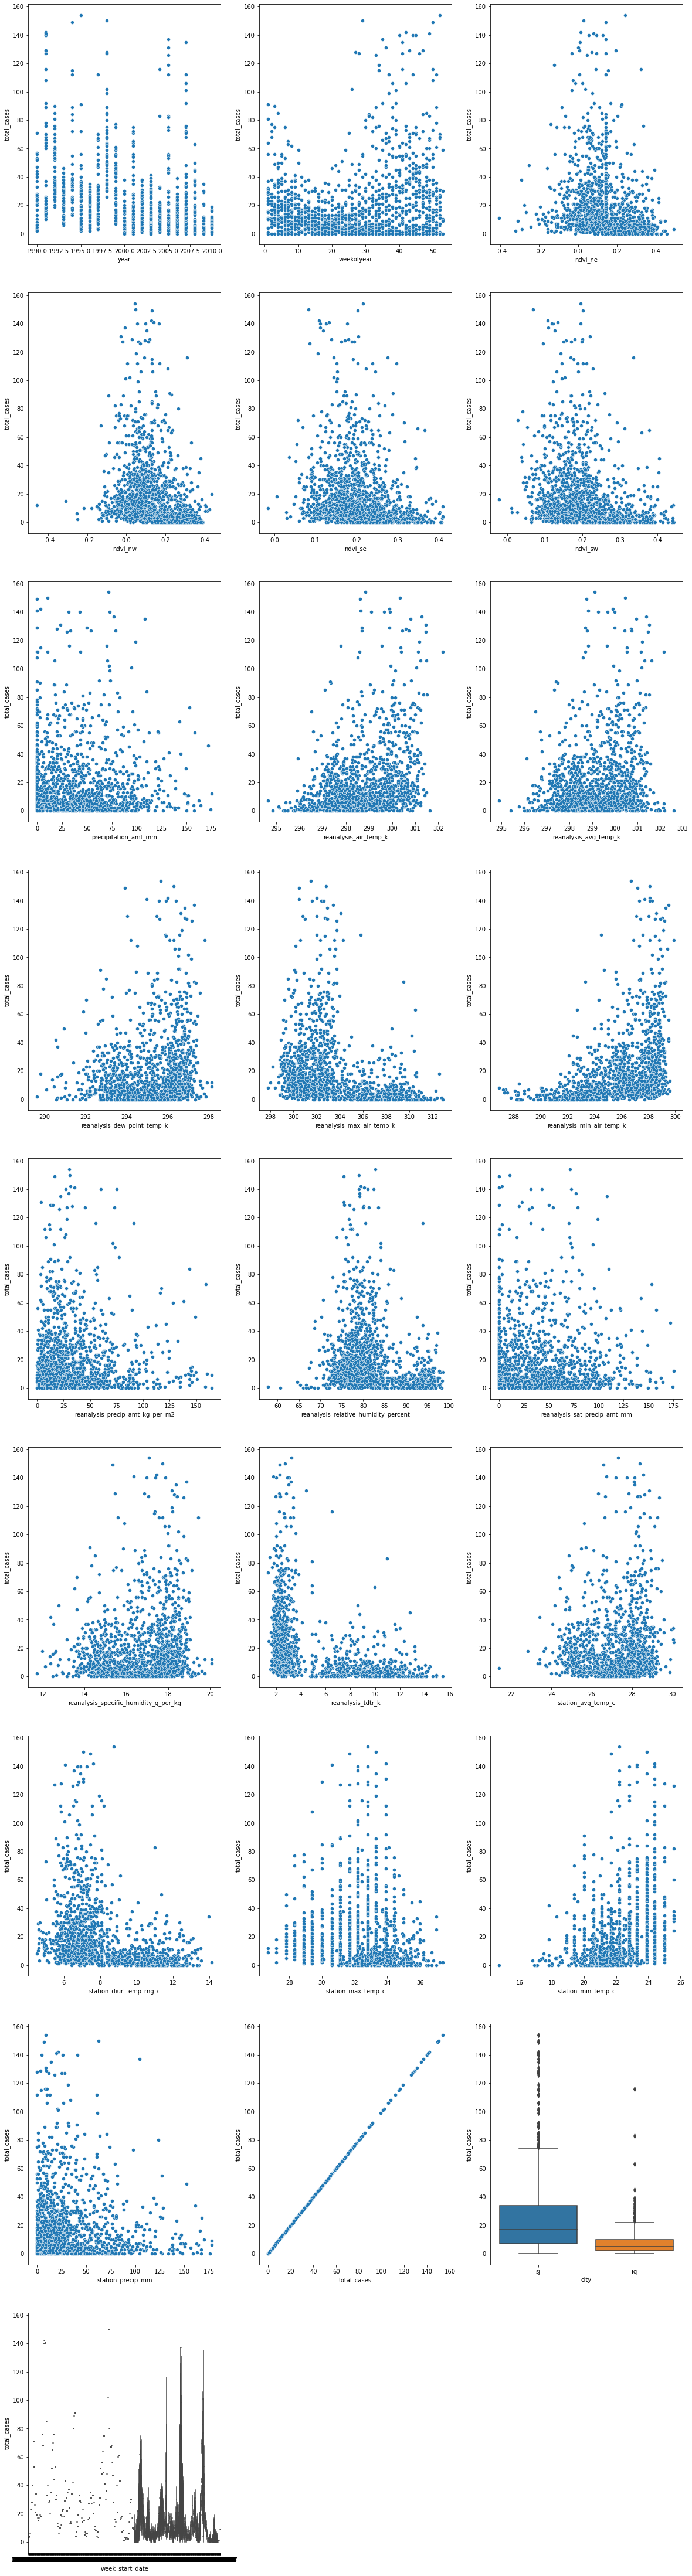

In [18]:
pf.BIV(a,(20,80),"total_cases")

# **Heatmap**

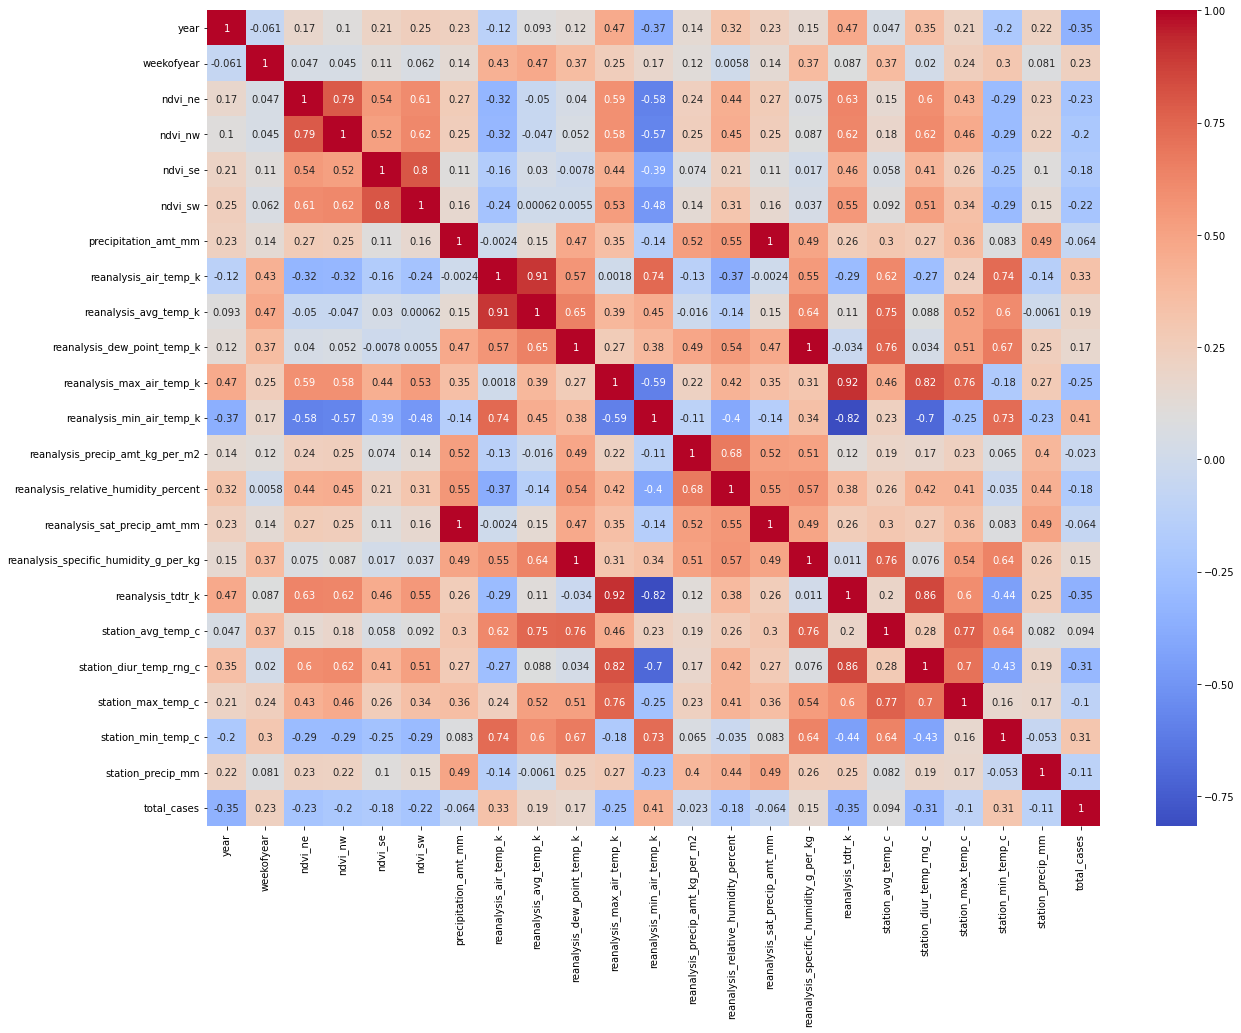

In [19]:
pf.HEATMAP(a,(20,15))

# **Correlation**

In [20]:
a.corr()[["total_cases"]].sort_values(by="total_cases")

,total_cases
reanalysis_tdtr_k,-0.354585
year,-0.347591
station_diur_temp_rng_c,-0.309301
reanalysis_max_air_temp_k,-0.254829
ndvi_ne,-0.230729
ndvi_sw,-0.220626
ndvi_nw,-0.204023
ndvi_se,-0.183595
reanalysis_relative_humidity_percent,-0.182767
station_precip_mm,-0.110676


# **ANOVA**

In [21]:
pf.anova_ana_con(a,"total_cases")

--------------- total_cases vs city -----------------------
pvalue:  3.8866542339285135e-30 

--------------- total_cases vs week_start_date -----------------------
pvalue:  2.4788131139444166e-13 



In [22]:
pf.anova_con(a,"total_cases")

['city', 'week_start_date']

In [23]:
imp_con=["reanalysis_tdtr_k","year","station_diur_temp_rng_c","station_min_temp_c","reanalysis_air_temp_k","reanalysis_min_air_temp_k"]

In [24]:
imp_cat=["city"]

# **Defining X and Y**

In [25]:
Y=a[["total_cases"]]

In [26]:
X=a[imp_con+imp_cat]

# **Preprocessing**

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X1=pd.DataFrame(ss.fit_transform(X[imp_con]),columns=imp_con)
X2=pd.get_dummies(X[imp_cat])

Xnew=X1.join(X2)

In [28]:
Xnew.head(2)

,reanalysis_tdtr_k,year,station_diur_temp_rng_c,station_min_temp_c,reanalysis_air_temp_k,reanalysis_min_air_temp_k,city_iq,city_sj
0,-0.620092,-2.021959,-0.534147,-1.324060,-0.836209,0.046469,0,1
1,-0.693486,-2.021959,-0.792988,0.064816,-0.368276,0.241833,0,1


# **Model Creation**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# **Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(xtrain,ytrain)

In [ ]:
pred_tr_lm = model.predict(xtrain)
pred_ts_lm = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_lm=round(mean_absolute_error(ytrain,pred_tr_lm),5)
ts_lm=round(mean_absolute_error(ytest,pred_ts_lm),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_lm),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_lm),5))

Training Error:  14.70407
Testing Error:  13.72739


# **KNN regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
model_knr =knr.fit(xtrain,ytrain)

pred_tr_knr = model_knr.predict(xtrain)
pred_ts_knr = model_knr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_knr=round(mean_absolute_error(ytrain,pred_tr_knr),5)
ts_knr=round(mean_absolute_error(ytest,pred_ts_knr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_knr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_knr),5))

Training Error:  11.78241
Testing Error:  12.06343


In [ ]:
from sklearn.model_selection import GridSearchCV
tg = {"n_neighbors":range(2,15)}
knr=KNeighborsRegressor()
cv = GridSearchCV(knr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_neighbors': 13}

In [ ]:
knr=KNeighborsRegressor(n_neighbors=13)
model_knr =knr.fit(xtrain,ytrain)

pred_tr_knr = model_knr.predict(xtrain)
pred_ts_knr = model_knr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_knr=round(mean_absolute_error(ytrain,pred_tr_knr),5)
ts_knr=round(mean_absolute_error(ytest,pred_ts_knr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_knr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_knr),5))

Training Error:  13.09765
Testing Error:  12.12371


# **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=1.05)
model_ls=ls.fit(xtrain,ytrain)

pred_tr_ls = model_ls.predict(xtrain)
pred_ts_ls = model_ls.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_ls=round(mean_absolute_error(ytrain,pred_tr_ls),5)
ts_ls=round(mean_absolute_error(ytest,pred_ts_ls),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_ls),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_ls),5))

Training Error:  14.77983
Testing Error:  13.86718


In [ ]:
vals_to_try=[]
x=1
for i in range(0,50):
  x=x-0.01
  vals_to_try.append(round(x,3))
x=1
for i in range(0,50):
  x=x+0.01
  vals_to_try.append(round(x,3))

tg={"alpha":vals_to_try}

from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(ls,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.7}

In [ ]:
ls=Lasso(alpha=0.7)
model_ls=ls.fit(xtrain,ytrain)

pred_tr_ls = model_ls.predict(xtrain)
pred_ts_ls = model_ls.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_ls=round(mean_absolute_error(ytrain,pred_tr_ls),5)
ts_ls=round(mean_absolute_error(ytest,pred_ts_ls),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_ls),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_ls),5))

Training Error:  14.77724
Testing Error:  13.89057


# **Ridge**

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1.05)
model_rr=rr.fit(xtrain,ytrain)

pred_tr_rr = model_rr.predict(xtrain)
pred_ts_rr = model_rr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_rr=round(mean_absolute_error(ytrain,pred_tr_rr),5)
ts_rr=round(mean_absolute_error(ytest,pred_ts_rr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_rr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_rr),5))

Training Error:  14.70338
Testing Error:  13.72681


In [ ]:
vals_to_try=[]
x=1
for i in range(0,50):
  x=x-0.01
  vals_to_try.append(round(x,3))
x=1
for i in range(0,50):
  x=x+0.01
  vals_to_try.append(round(x,3))

tg={"alpha":vals_to_try}

from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.5}

In [ ]:
rr=Ridge(alpha=1.5)
model_rr=rr.fit(xtrain,ytrain)

pred_tr_rr = model_rr.predict(xtrain)
pred_ts_rr = model_rr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_rr=round(mean_absolute_error(ytrain,pred_tr_rr),5)
ts_rr=round(mean_absolute_error(ytest,pred_ts_rr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_rr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_rr),5))

Training Error:  14.70311
Testing Error:  13.72651


# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31)
model_dtr = dtr.fit(xtrain,ytrain)

pred_tr_dtr = model_dtr.predict(xtrain)
pred_ts_dtr = model_dtr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_dtr=round(mean_absolute_error(ytrain,pred_tr_dtr),5)
ts_dtr=round(mean_absolute_error(ytest,pred_ts_dtr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_dtr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_dtr),5))

Training Error:  0.0
Testing Error:  13.79851


# **Decision Tree Max Depth**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31,max_depth=5)
model_mdepth = dtr.fit(xtrain,ytrain)

pred_tr_mdepth = model_mdepth.predict(xtrain)
pred_ts_mdepth = model_mdepth.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_mdepth=round(mean_absolute_error(ytrain,pred_tr_mdepth),5)
ts_mdepth=round(mean_absolute_error(ytest,pred_ts_mdepth),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_mdepth),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_mdepth),5))

Training Error:  10.17025
Testing Error:  12.10075


In [ ]:
tg={"max_depth":range(2,20)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31)
cv=GridSearchCV(dtr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 3}

In [ ]:
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31,max_depth=3)
model_mdepth = dtr.fit(xtrain,ytrain)

pred_tr_mdepth = model_mdepth.predict(xtrain)
pred_ts_mdepth = model_mdepth.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_mdepth=round(mean_absolute_error(ytrain,pred_tr_mdepth),5)
ts_mdepth=round(mean_absolute_error(ytest,pred_ts_mdepth),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_mdepth),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_mdepth),5))

Training Error:  12.12348
Testing Error:  10.77239


# **Decision Tree min_samples_split**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31,min_samples_split=11)
model_msplit = dtr.fit(xtrain,ytrain)

pred_tr_msplit = model_msplit.predict(xtrain)
pred_ts_msplit = model_msplit.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_msplit=round(mean_absolute_error(ytrain,pred_tr_msplit),5)
ts_msplit=round(mean_absolute_error(ytest,pred_ts_msplit),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_msplit),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_msplit),5))

Training Error:  6.01216
Testing Error:  11.72015


In [ ]:
tg={"min_samples_split":range(2,20)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31)
cv=GridSearchCV(dtr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 18}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31,min_samples_split=18)
model_msplit = dtr.fit(xtrain,ytrain)

pred_tr_msplit = model_msplit.predict(xtrain)
pred_ts_msplit = model_msplit.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_msplit=round(mean_absolute_error(ytrain,pred_tr_msplit),5)
ts_msplit=round(mean_absolute_error(ytest,pred_ts_msplit),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_msplit),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_msplit),5))

Training Error:  7.42376
Testing Error:  11.25746


# **Decision Tree min_samples_leaf**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31,min_samples_leaf=11)
model_mleaf = dtr.fit(xtrain,ytrain)

pred_tr_mleaf = model_mleaf.predict(xtrain)
pred_ts_mleaf = model_mleaf.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_mleaf=round(mean_absolute_error(ytrain,pred_tr_mleaf),5)
ts_mleaf=round(mean_absolute_error(ytest,pred_ts_mleaf),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_mleaf),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_mleaf),5))

Training Error:  9.56221
Testing Error:  10.625


In [ ]:
tg={"min_samples_leaf":range(2,20)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31)
cv=GridSearchCV(dtr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 19}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="absolute_error",random_state=31,min_samples_leaf=19)
model_mleaf = dtr.fit(xtrain,ytrain)

pred_tr_mleaf = model_mleaf.predict(xtrain)
pred_ts_mleaf = model_mleaf.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_mleaf=round(mean_absolute_error(ytrain,pred_tr_mleaf),5)
ts_mleaf=round(mean_absolute_error(ytest,pred_ts_mleaf),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_mleaf),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_mleaf),5))

Training Error:  10.82601
Testing Error:  11.52425


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion="absolute_error",random_state=31,min_samples_leaf=19,n_estimators=30)
model_rfr =rfr.fit(xtrain,ytrain)

pred_tr_rfr = model_rfr.predict(xtrain)
pred_ts_rfr = model_rfr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_rfr=round(mean_absolute_error(ytrain,pred_tr_rfr),5)
ts_rfr=round(mean_absolute_error(ytest,pred_ts_rfr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_rfr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_rfr),5))

Training Error:  11.2097
Testing Error:  10.69391


In [ ]:
"""tg={"criterion":["absolute_error","poisson"],"min_samples_leaf":range(2,20),"n_estimators":range(2,30)}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=31)
cv=GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_"""

'tg={"criterion":["absolute_error","poisson"],"min_samples_leaf":range(2,20),"n_estimators":range(2,30)}\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\nrfr = RandomForestRegressor(random_state=31)\ncv=GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)\ncvmodel=cv.fit(xtrain,ytrain)\ncvmodel.best_params_'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion="absolute_error",random_state=31,min_samples_leaf=9,n_estimators=18)
model_rfr =rfr.fit(xtrain,ytrain)

pred_tr_rfr = model_rfr.predict(xtrain)
pred_ts_rfr = model_rfr.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_rfr=round(mean_absolute_error(ytrain,pred_tr_rfr),5)
ts_rfr=round(mean_absolute_error(ytest,pred_ts_rfr),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_rfr),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_rfr),5))

Training Error:  10.0324
Testing Error:  10.99658


# **AdaBoost**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

dtr=DecisionTreeRegressor(criterion="absolute_error",random_state=31,min_samples_leaf=19)
ada=AdaBoostRegressor(dtr,n_estimators=30)
model_ada =ada.fit(xtrain,ytrain)

pred_tr_ada = model_ada.predict(xtrain)
pred_ts_ada = model_ada.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_ada=round(mean_absolute_error(ytrain,pred_tr_ada),5)
ts_ada=round(mean_absolute_error(ytest,pred_ts_ada),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_ada),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_ada),5))

Training Error:  8.21703
Testing Error:  12.09328


In [ ]:
tg={"n_estimators":range(2,30)}

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

ada = AdaBoostRegressor(dtr,random_state=31)
cv=GridSearchCV(ada,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 8}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

dtr=DecisionTreeRegressor(criterion="absolute_error",random_state=31,min_samples_leaf=19)
ada=AdaBoostRegressor(dtr,n_estimators=8)
model_ada =ada.fit(xtrain,ytrain)

pred_tr_ada = model_ada.predict(xtrain)
pred_ts_ada = model_ada.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_ada=round(mean_absolute_error(ytrain,pred_tr_ada),5)
ts_ada=round(mean_absolute_error(ytest,pred_ts_ada),5)

print("Training Error: ",round(mean_absolute_error(ytrain,pred_tr_ada),5))
print("Testing Error: ",round(mean_absolute_error(ytest,pred_ts_ada),5))

Training Error:  9.21422
Testing Error:  11.77239


# **Regression Results**

In [ ]:
Reg_Res=pd.DataFrame()

Reg_Res["Model"]=["SimpleLinearRegression","KNN","Ridge","Lasso","DTR","DTmdepth","DTmsplit","DTmleaf","RF","Ada"]

Reg_Res["Bias"]=[tr_lm,tr_knr,tr_rr,tr_ls,tr_dtr,tr_mdepth,tr_msplit,tr_mleaf,tr_rfr,tr_ada]

Reg_Res["Variance"]=[ts_lm,ts_knr,ts_rr,ts_ls,ts_dtr,ts_mdepth,ts_msplit,ts_mleaf,ts_rfr,ts_ada]

Reg_Res["Difference"]=Reg_Res["Variance"]-Reg_Res["Bias"] 

In [ ]:
Reg_Res

,Model,Bias,Variance,Difference
0,SimpleLinearRegression,14.70407,13.72739,-0.97668
1,KNN,13.09765,12.12371,-0.97394
2,Ridge,14.70311,13.72651,-0.97660
3,Lasso,14.77724,13.89057,-0.88667
4,DTR,0.00000,13.79851,13.79851
5,DTmdepth,12.12348,10.77239,-1.35109
6,DTmsplit,7.42376,11.25746,3.83370
7,DTmleaf,10.82601,11.52425,0.69824
8,RF,10.03240,10.99658,0.96418
9,Ada,9.21422,11.77239,2.55817


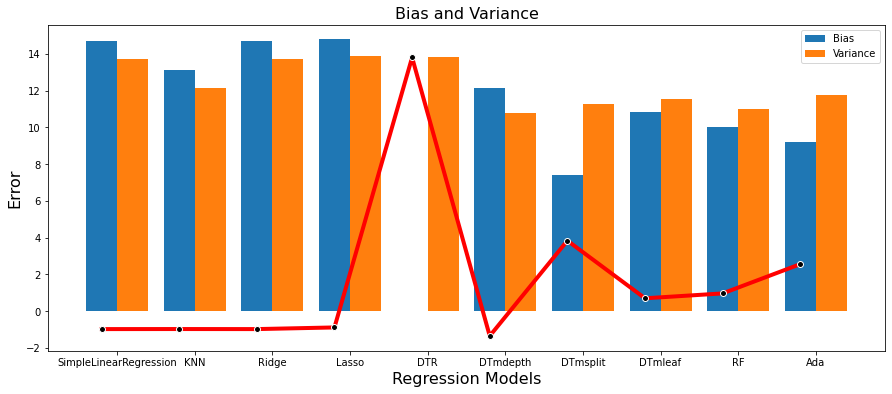

In [ ]:
w=0.4
name=list(Reg_Res["Model"])
Biases=list(Reg_Res["Bias"])
Variances=list(Reg_Res["Variance"])

bar1=np.arange(len(name))
bar2=[i+w for i in bar1]
plt.figure(figsize=(15,6))
plt.bar(bar1,Biases,w,label="Bias")
plt.bar(bar2,Variances,w,label="Variance")
plt.xlabel("Regression Models",size=16)
plt.ylabel("Error",size=16)
plt.title("Bias and Variance",size=16)
plt.xticks(bar1+(w/2),name)
plt.plot(Reg_Res["Difference"],color="red",lw="4",marker="o",mec="w",mfc="k")
plt.legend();

In [ ]:
Reg_Res

,Model,Bias,Variance,Difference
0,SimpleLinearRegression,14.70407,13.72739,-0.97668
1,KNN,13.09765,12.12371,-0.97394
2,Ridge,14.70311,13.72651,-0.97660
3,Lasso,14.77724,13.89057,-0.88667
4,DTR,0.00000,13.79851,13.79851
5,DTmdepth,12.12348,10.77239,-1.35109
6,DTmsplit,7.42376,11.25746,3.83370
7,DTmleaf,10.82601,11.52425,0.69824
8,RF,10.03240,10.99658,0.96418
9,Ada,9.21422,11.77239,2.55817


**Best Models:**

1. DTmleaf 0.69824
2. RF 0.96418

# **Predicting**

In [ ]:
B=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Personal Projects/Dengue Data Driven/dengue_features_test.csv")

In [ ]:
B1=B[imp_con+imp_cat]

In [ ]:
B1.isna().sum()

reanalysis_tdtr_k             2
year                          0
station_diur_temp_rng_c      12
station_min_temp_c            9
reanalysis_air_temp_k         2
reanalysis_min_air_temp_k     2
city                          0
dtype: int64

In [ ]:
pf.replacer(B1)

reanalysis_tdtr_k            0
year                         0
station_diur_temp_rng_c      0
station_min_temp_c           0
reanalysis_air_temp_k        0
reanalysis_min_air_temp_k    0
city                         0
dtype: int64

In [ ]:
#Preprocessing

b1=pd.DataFrame(ss.transform(B1[imp_con]),columns=imp_con)
b2=pd.get_dummies(B1[imp_cat])

Bnew=b1.join(b2)

# **Prediction Using Decision Tree minimum samples leaf model**

In [ ]:
pred_mleaf=model_mleaf.predict(Bnew)

In [ ]:
B.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [ ]:
T1=B[["city","year","weekofyear"]]
T1["total_cases"]=pred_mleaf
T1.set_index("city",inplace=True)
T1["total_cases"]=T1["total_cases"].astype(int)


T1.to_csv("Submission_mleaf.csv")

# **Prediction Using Random Forest model**

In [ ]:
pred_rf =model_rfr.predict(Bnew)

In [ ]:
T2=B[["city","year","weekofyear"]]
T2["total_cases"]=pred_rf
T2.set_index("city",inplace=True)
T2["total_cases"]=T2["total_cases"].astype(int)

T2.to_csv("Submission_RF.csv")

# **T1 = Minimun Samples leaf Prediction**

In [ ]:
T1

,year,weekofyear,total_cases
city,,,
sj,2008,18,7
sj,2008,19,6
sj,2008,20,7
sj,2008,21,17
sj,2008,22,5
...,...,...,...
iq,2013,22,5
iq,2013,23,5
iq,2013,24,1


# **T2 = Random Forest Prediction**

In [ ]:
T2

,year,weekofyear,total_cases
city,,,
sj,2008,18,7
sj,2008,19,9
sj,2008,20,6
sj,2008,21,6
sj,2008,22,5
...,...,...,...
iq,2013,22,5
iq,2013,23,2
iq,2013,24,2
